# Projeto - Vendas  de carro

In [21]:
import pandas as pd

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [23]:
url = 'https://gist.githubusercontent.com/guilhermesilveira/4d1d4a16ccbf6ea4e0a64a38a24ec884/raw/afd05cb0c796d18f3f5a6537053ded308ba94bf7/car-prices.csv'
df = pd.read_csv(url)

In [24]:
df.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [25]:
mapa_colunas = {
    'Unnamed: 0': 'id',
    'mileage_per_year': 'milhas_por_ano',
    'model_year': 'ano_do_modelo',
    'price': 'preco',
    'sold': 'vendido'
}

In [26]:
df.rename(columns=mapa_colunas, inplace=True)

In [27]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [28]:
mapa_vendido = {
    'yes': 1,
    'no': 0
}

In [29]:
df['vendido'] = df['vendido'].map(mapa_vendido)

In [30]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [31]:
df.describe()

,id,milhas_por_ano,ano_do_modelo,preco,vendido
count,10000.00000,10000.000000,10000.00000,10000.000000,10000.000000
mean,4999.50000,14183.391200,2004.14420,64842.373698,0.580000
std,2886.89568,5008.571422,4.68758,25250.592393,0.493583
min,0.00000,363.000000,1998.00000,-840.360000,0.000000
25%,2499.75000,10474.750000,2000.00000,44796.375000,0.000000
50%,4999.50000,13418.500000,2003.00000,65225.685000,1.000000
75%,7499.25000,17176.750000,2007.00000,85111.237500,1.000000
max,9999.00000,39572.000000,2017.00000,118929.720000,1.000000


In [32]:
from datetime import datetime 

In [33]:
df['idade_do_modelo'] = (datetime.today().year - df['ano_do_modelo'])

In [34]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,20
1,1,7843,1998,40557.96,1,22
2,2,7109,2006,89627.50,0,14
3,3,26823,2015,95276.14,0,5
4,4,7935,2014,117384.68,1,6


In [35]:
df['km_por_ano'] = (df['milhas_por_ano']*1.60934)

In [36]:
df.head()

,id,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,20,35085.22134
1,1,7843,1998,40557.96,1,22,12622.05362
2,2,7109,2006,89627.50,0,14,11440.79806
3,3,26823,2015,95276.14,0,5,43167.32682
4,4,7935,2014,117384.68,1,6,12770.11290


In [37]:
df.drop(columns=['id', 'milhas_por_ano', 'ano_do_modelo'], inplace=True)

In [38]:
df.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,20,35085.22134
1,40557.96,1,22,12622.05362
2,89627.50,0,14,11440.79806
3,95276.14,0,5,43167.32682
4,117384.68,1,6,12770.11290


In [39]:
df['modelo'] = df['idade_do_modelo'] + np.random.randint(-3, 4, len(df))
df['modelo'] = df['modelo'].apply(lambda x: abs(x) if x < 0 else x)

In [40]:
df.head()

,preco,vendido,idade_do_modelo,km_por_ano,modelo
0,30941.02,1,20,35085.22134,19
1,40557.96,1,22,12622.05362,25
2,89627.50,0,14,11440.79806,13
3,95276.14,0,5,43167.32682,5
4,117384.68,1,6,12770.11290,7


In [41]:
x = df[['idade_do_modelo', 'preco', 'km_por_ano']]
y = df[['vendido']]


raw_x_train, raw_x_test, y_train, y_test = train_test_split(x, y, random_state=30, test_size=0.2, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_x_train)
x_train = scaler.transform(raw_x_train)
x_test = scaler.transform(raw_x_test)

model = SVC()

model.fit(x_train, y_train)

y_pred = model.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia é de {acc}')

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


A Acurácia é de 0.771


## Dummy Classifier

In [42]:
from sklearn.dummy import DummyClassifier

In [43]:
dummy = DummyClassifier()

dummy.fit(x_train, y_train)

y_pred = dummy.predict(x_test)

acc = accuracy_score(y_test, y_pred)
print(f'A Acurácia do Dummy é de {acc}')

A Acurácia do Dummy é de 0.511


## Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier

In [45]:
SEED = 123929
np.random.seed(SEED)
model = DecisionTreeClassifier(max_depth=3)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
acc = accuracy_score(y_test,y_pred)

print(f'A acurácia é {acc}')

A acurácia é 0.795


# Cross-Validation

In [46]:
from sklearn.model_selection import cross_validate, KFold, StratifiedKFold, GroupKFold

In [66]:
def get_accuracy_interval(x: pd.DataFrame, y: pd.DataFrame, max_depth:int=1, k_intervals:int=1, seed: int=None) -> None:
    if seed:
        SEED = seed
        np.random.seed(SEED)
        
    model = DecisionTreeClassifier(max_depth=max_depth)
    cv = KFold(n_splits=k_intervals, shuffle=True)
    results = cross_validate(model, x, y, cv=cv, return_train_score=True)
    
    result_mean = results['test_score'].mean()
    result_std = results['test_score'].std()
    result_interval = (result_mean - 2*result_std, result_mean + 2*result_std)
    print(f'Accuracy Mean {result_mean}')
    print(f'Accuracy interval {result_interval}')
    
    return None

In [67]:
get_accuracy_interval(x, y, 3, 3)

Accuracy Mean 0.7861997957444214
Accuracy interval (0.7783032857626563, 0.7940963057261866)


## Stratified KFold

In [49]:
def get_accuracy_interval(x: pd.DataFrame, y: pd.DataFrame, max_depth:int=1, k_intervals:int=1, seed: int=None) -> None:
    if seed:
        SEED = 5
        np.random.seed(SEED)
        
    model = DecisionTreeClassifier(max_depth=max_depth)
    cv = StratifiedKFold(n_splits=k_intervals, shuffle=True)
    results = cross_validate(model, x, y, cv=cv, return_train_score=True)
    
    result_mean = results['test_score'].mean()
    result_std = results['test_score'].std()
    result_interval = (result_mean - 2*result_std, result_mean + 2*result_std)
    print(f'Accuracy Mean {result_mean}')
    print(f'Accuracy interval {result_interval}')
    
    return None

In [100]:
get_accuracy_interval(x, y, 3, 3)

Accuracy Mean 0.7866001657154319
Accuracy interval (0.7836962185820237, 0.7895041128488401)


In [101]:
get_accuracy_interval(x, y, 3, 3)

Accuracy Mean 0.7870997657654187
Accuracy interval (0.7783632768958019, 0.7958362546350356)


In [50]:
def get_accuracy_interval_with_groups(x: pd.DataFrame, y: pd.DataFrame, max_depth:int=1, k_intervals:int=1, seed: int=None, groups: pd.DataFrame=None) -> None:
    if seed:
        SEED = 5
        np.random.seed(SEED)
        
    model = DecisionTreeClassifier(max_depth=max_depth)
    cv = GroupKFold(n_splits=k_intervals)
    results = cross_validate(model, x, y, cv=cv, groups=groups, return_train_score=True)
    
    result_mean = results['test_score'].mean()
    result_std = results['test_score'].std()
    result_interval = (result_mean - 2*result_std, result_mean + 2*result_std)
    print(f'Accuracy Mean {result_mean}')
    print(f'Accuracy interval {result_interval}')
    
    return None

In [222]:
get_accuracy_interval_with_groups(x=x, y=y, max_depth:int=1, k_intervals=3, seed=3, groups=df['modelo'])

Accuracy Mean 0.7577125033497115
Accuracy interval (0.7494458314223474, 0.7659791752770756)


# Cross-Validation with StandardScaler

In [223]:
from sklearn.preprocessing import StandardScaler

In [226]:
scaler = StandardScaler()
scaler.fit(x_train)
scaled_x_train = scaler.transform(x_train)
scaled_x_test = scaler.transform(x_test)

# Using Pipeline

In [52]:
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC

In [53]:
scaler = StandardScaler()
model = DecisionTreeClassifier()

In [155]:
def get_accuracy_interval_with_groups_with_pipeline(x: pd.DataFrame, 
                                                    y: pd.DataFrame, 
                                                    max_depth:int=1, 
                                                    min_samples_split: int=2,
                                                    min_samples_leaf: int=1,
                                                    k_intervals:int=2, 
                                                    seed: int=None, 
                                                    groups: pd.DataFrame=None) -> None:
    
    if seed:
        np.random.seed(seed)
        
    scaler = StandardScaler()
    model = DecisionTreeClassifier(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)
    
    pipeline = Pipeline([
        ('transformacao', scaler),
        ('estimador', model)
    ])
    
    
    cv = GroupKFold(n_splits=k_intervals)
    results = cross_validate(pipeline, x, y, cv=cv, groups=groups, return_train_score=True)

    train_score_mean = results['train_score'].mean()
    train_score_std = results['train_score'].std()
    train_score_interval = (train_score_mean - 2*train_score_std, train_score_mean + 2*train_score_std)
    print(f'Accuracy Mean - TRAIN {train_score_mean}')
    print(f'Accuracy interval - TRAIN {train_score_interval}')
    
    test_score_mean = results['test_score'].mean()
    test_score_std = results['test_score'].std()
    test_score_interval = (test_score_mean - 2*test_score_std, test_score_mean + 2*test_score_std)
    print(f'Accuracy Mean - TEST - {test_score_mean}')
    print(f'Accuracy interval - TEST - {test_score_interval}')
    
    train_time = results['fit_time'].mean()
    test_time = results['score_time'].mean()
    
    return [max_depth, min_samples_split, min_samples_leaf, train_score_mean, test_score_mean, train_time, test_time]

In [156]:
# resultados = [get_accuracy_interval_with_groups_with_pipeline(x=x, y=y, max_depth=i, groups=df['modelo']) for i in range(1,35)]

The graph above demonstrate the overfitting. Good results for train, but bad results for test through the rise of max_depth

In [157]:
resultados = []
for i in range(1,17):
    for j in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
        for k in [2, 4, 8, 16, 32, 64, 128, 256, 512, 1024]:
            resultados.append(get_accuracy_interval_with_groups_with_pipeline(x=x, y=y, max_depth=i, min_samples_split=j, min_samples_leaf=k, groups=df['modelo']))

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7877965041897628
Accuracy interval - TRAIN (0.7790569785964664, 0.7965360297830592)
Accuracy Mean - TEST - 0.7865963434216598
Accuracy interval - TEST - (0.7774548975711345, 0.7957377892721852)
Accuracy Mean - TRAIN 0.7877965041897628
Accuracy interval - TRAIN (0.7790569785964664, 0.7965360297830592)
Accuracy Mean - TEST - 0.7865963434216598
Accuracy interval - TEST - (0.7774548975711345, 0.7957377892721852)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869

Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636

Accuracy Mean - TRAIN 0.7877965041897628
Accuracy interval - TRAIN (0.7790569785964664, 0.7965360297830592)
Accuracy Mean - TEST - 0.7865963434216598
Accuracy interval - TEST - (0.7774548975711345, 0.7957377892721852)
Accuracy Mean - TRAIN 0.7877965041897628
Accuracy interval - TRAIN (0.7790569785964664, 0.7965360297830592)
Accuracy Mean - TEST - 0.7865963434216598
Accuracy interval - TEST - (0.7774548975711345, 0.7957377892721852)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869966636778647
Accuracy interval - TEST - (0.7786558583397493, 0.7953374690159801)
Accuracy Mean - TRAIN 0.787596664061865
Accuracy interval - TRAIN (0.779256818724364, 0.795936509399366)
Accuracy Mean - TEST - 0.7869

Accuracy Mean - TRAIN 0.7899953855970467
Accuracy interval - TRAIN (0.778459378214002, 0.8015313929800915)
Accuracy Mean - TEST - 0.7816951402848897
Accuracy interval - TEST - (0.7695458525093456, 0.7938444280604339)
Accuracy Mean - TRAIN 0.7899953855970467
Accuracy interval - TRAIN (0.778459378214002, 0.8015313929800915)
Accuracy Mean - TEST - 0.782195540605146
Accuracy interval - TEST - (0.7710470534701142, 0.7933440277401778)
Accuracy Mean - TRAIN 0.7897955454691491
Accuracy interval - TRAIN (0.7786592183418998, 0.8009318725963984)
Accuracy Mean - TEST - 0.7820954605410948
Accuracy interval - TEST - (0.7707468132779606, 0.793444107804229)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.

Accuracy Mean - TRAIN 0.7895950653408419
Accuracy interval - TRAIN (0.7772584174453873, 0.8019317132362965)
Accuracy Mean - TEST - 0.7833937813720201
Accuracy interval - TEST - (0.7678472114222153, 0.7989403513218248)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 

Accuracy interval - TRAIN (0.7815626602001025, 0.8018292331707093)
Accuracy Mean - TEST - 0.7841963418856588
Accuracy interval - TEST - (0.7750510560326759, 0.7933416277386417)
Accuracy Mean - TRAIN 0.790996506237764
Accuracy interval - TRAIN (0.7822621006477444, 0.7997309118277836)
Accuracy Mean - TEST - 0.782595060860839
Accuracy interval - TEST - (0.7702472129582163, 0.7949429087634616)
Accuracy Mean - TRAIN 0.7907966661098663
Accuracy interval - TRAIN (0.782461940775642, 0.7991313914440906)
Accuracy Mean - TEST - 0.782595060860839
Accuracy interval - TEST - (0.7702472129582163, 0.7949429087634616)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST

Accuracy Mean - TRAIN 0.790996506237764
Accuracy interval - TRAIN (0.7822621006477444, 0.7997309118277836)
Accuracy Mean - TEST - 0.782595060860839
Accuracy interval - TEST - (0.7702472129582163, 0.7949429087634616)
Accuracy Mean - TRAIN 0.7907966661098663
Accuracy interval - TRAIN (0.782461940775642, 0.7991313914440906)
Accuracy Mean - TEST - 0.782595060860839
Accuracy interval - TEST - (0.7702472129582163, 0.7949429087634616)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.

Accuracy Mean - TRAIN 0.794494348476383
Accuracy interval - TRAIN (0.7803655394339452, 0.8086231575188209)
Accuracy Mean - TEST - 0.7749936159959143
Accuracy interval - TEST - (0.7590336057815078, 0.7909536262103208)
Accuracy Mean - TRAIN 0.7948959487334072
Accuracy interval - TRAIN (0.7847677822513807, 0.8050241152154337)
Accuracy Mean - TEST - 0.7660004902403138
Accuracy interval - TEST - (0.7647748894559293, 0.7672260910246983)
Accuracy Mean - TRAIN 0.7937960280294579
Accuracy interval - TRAIN (0.783866101674305, 0.8037259543846108)
Accuracy Mean - TEST - 0.7778935378518642
Accuracy interval - TEST - (0.7617381675124272, 0.7940489081913013)
Accuracy Mean - TRAIN 0.792296267069611
Accuracy interval - TRAIN (0.7829639410969224, 0.8016285930422996)
Accuracy Mean - TEST - 0.7774933775957618
Accuracy interval - TEST - (0.760937366999915, 0.7940493881916085)
Accuracy Mean - TRAIN 0.791596026621457
Accuracy interval - TRAIN (0.7816625802640513, 0.8015294729788627)
Accuracy Mean - TEST - 0.

Accuracy Mean - TRAIN 0.7940937082199733
Accuracy interval - TRAIN (0.7783642581531252, 0.8098231582868214)
Accuracy Mean - TEST - 0.7761926567633004
Accuracy interval - TEST - (0.7578345650141217, 0.7945507485124791)
Accuracy Mean - TRAIN 0.7944941884762806
Accuracy interval - TRAIN (0.7799653791778427, 0.8090229977747185)
Accuracy Mean - TEST - 0.7769950572768367
Accuracy interval - TEST - (0.7646382493684797, 0.7893518651851937)
Accuracy Mean - TRAIN 0.7948959487334072
Accuracy interval - TRAIN (0.7847677822513807, 0.8050241152154337)
Accuracy Mean - TEST - 0.7660004902403138
Accuracy interval - TEST - (0.7647748894559293, 0.7672260910246983)
Accuracy Mean - TRAIN 0.7937960280294579
Accuracy interval - TRAIN (0.783866101674305, 0.8037259543846108)
Accuracy Mean - TEST - 0.7778935378518642
Accuracy interval - TEST - (0.7617381675124272, 0.7940489081913013)
Accuracy Mean - TRAIN 0.792296267069611
Accuracy interval - TRAIN (0.7829639410969224, 0.8016285930422996)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.791596026621457
Accuracy interval - TRAIN (0.7816625802640513, 0.8015294729788627)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7895950653408419
Accuracy interval - TRAIN (0.7772584174453873, 0.8019317132362965)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.791596026621457
Accuracy interval - TRAIN (0.7816625802640513, 0.8015294729788627)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.7981928308434117
Accuracy interval - TRAIN (0.7802699393727611, 0.8161157223140624)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.791895146812894
Accuracy interval - TRAIN (0.7797621790477945, 0.8040281145779934)
Accuracy Mean - TEST - 0.7785920182988917
Accuracy interval - TEST - (0.75863776552817, 0.7985462710696134)
Accuracy Mean - TRAIN 0.7914953065569963
Accuracy interval - TRAIN (0.7797616990474875, 0.8032289140665051)
Accuracy Mean - TEST - 0.7782922581070452
Accuracy interval - TEST - (0.7589375257200165, 0.7976469904940738)
Accuracy Mean - TRAIN 0.7918959468134059
Accuracy interval - TRAIN (0.7817629803283074, 0.8020289132985045)
Accuracy Mean - TEST - 0.7762943368283757
Accuracy interval - TEST - (0.7621364077673011, 0.7904522658894503)
Accuracy Mean - TRAIN 0.7917958667493548
Accuracy interval - TRAIN (0.7814627401361537, 0.8021289933625558)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.7917958667493548
Accuracy interval - TRAIN (0.7814627401361537, 0.8021289933625558)
Accuracy Mean - TEST - 

Accuracy Mean - TRAIN 0.8037910744262876
Accuracy interval - TRAIN (0.7814771401453696, 0.8261050087072056)
Accuracy Mean - TEST - 0.7716944938844761
Accuracy interval - TEST - (0.7579292050746913, 0.7854597826942609)
Accuracy Mean - TRAIN 0.801293232827669
Accuracy interval - TRAIN (0.7843753020001932, 0.8182111636551447)
Accuracy Mean - TEST - 0.772897854654627
Accuracy interval - TEST - (0.7675344912220744, 0.7782612180871796)
Accuracy Mean - TRAIN 0.801296432829717
Accuracy interval - TRAIN (0.7923785071222446, 0.8102143585371894)
Accuracy Mean - TEST - 0.7642999291519547
Accuracy interval - TEST - (0.7641228090385978, 0.7644770492653116)
Accuracy Mean - TRAIN 0.7973960303334594
Accuracy interval - TRAIN (0.787471863981993, 0.8073201966849258)
Accuracy Mean - TEST - 0.7768946572125806
Accuracy interval - TEST - (0.7635376886641206, 0.7902516257610405)
Accuracy Mean - TRAIN 0.7938961080935092
Accuracy interval - TRAIN (0.7841663418664588, 0.8036258743205595)
Accuracy Mean - TEST - 0

Accuracy Mean - TRAIN 0.7971925102032066
Accuracy interval - TRAIN (0.7784680182195317, 0.8159170021868815)
Accuracy Mean - TEST - 0.7776949777247857
Accuracy interval - TEST - (0.7651392896891452, 0.7902506657604261)
Accuracy Mean - TRAIN 0.7970948301406913
Accuracy interval - TRAIN (0.7841701818689164, 0.8100194784124661)
Accuracy Mean - TEST - 0.7777979377906802
Accuracy interval - TEST - (0.7726424144911453, 0.782953461090215)
Accuracy Mean - TRAIN 0.7978967506539205
Accuracy interval - TRAIN (0.7897733854549668, 0.8060201158528743)
Accuracy Mean - TEST - 0.7715974538223704
Accuracy interval - TEST - (0.7652320097484862, 0.7779628978962547)
Accuracy Mean - TRAIN 0.7973960303334594
Accuracy interval - TRAIN (0.787471863981993, 0.8073201966849258)
Accuracy Mean - TEST - 0.7768946572125806
Accuracy interval - TEST - (0.7635376886641206, 0.7902516257610405)
Accuracy Mean - TRAIN 0.7938961080935092
Accuracy interval - TRAIN (0.7841663418664588, 0.8036258743205595)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.7899957055972515
Accuracy interval - TRAIN (0.7792596987262072, 0.8007317124682959)
Accuracy Mean - TEST - 0.7835942615003273
Accuracy interval - TEST - (0.7692480123187279, 0.7979405106819267)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7893952252129441
Accuracy interval - TRAIN (0.7774582575732849, 0.8013321928526034)
Accuracy Mean - TEST - 0.783794101628225
Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.7891953850850465
Accuracy interval - TRAIN (0.7776580977011825, 0.8007326724689104)
Accuracy Mean - TEST - 

Accuracy Mean - TRAIN 0.8000961120615118
Accuracy interval - TRAIN (0.7903762658408101, 0.8098159582822134)
Accuracy Mean - TEST - 0.7768959372133999
Accuracy interval - TEST - (0.7667389707129414, 0.7870529037138584)
Accuracy Mean - TRAIN 0.7958964293737147
Accuracy interval - TRAIN (0.7869698636607126, 0.8048229950867168)
Accuracy Mean - TEST - 0.7740927354193506
Accuracy interval - TEST - (0.7559312837960216, 0.7922541870426797)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.793396507773765
Accuracy interval - TRAIN (0.7846659421862031, 0.8021270733613269)
Accuracy Mean - TEST - 0.7783920181708917
Accuracy interval - TEST - (0.758437445399965, 0.7983465909418183)
Accuracy Mean - TRAIN 0.7930967475819184
Accuracy interval - TRAIN (0.7849657023780495, 0.8012277927857873)
Accuracy Mean - TEST - 0.7777907377860722
Accuracy interval - TEST - (0.75463520296653, 0.8009462726056145)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7

Accuracy Mean - TRAIN 0.8094983580789492
Accuracy interval - TRAIN (0.8053935554518755, 0.8136031607060229)
Accuracy Mean - TEST - 0.7602048065310762
Accuracy interval - TEST - (0.7481884788406264, 0.772221134221526)
Accuracy Mean - TRAIN 0.8013971528941779
Accuracy interval - TRAIN (0.7942793883388085, 0.8085149174495473)
Accuracy Mean - TEST - 0.7727992145914974
Accuracy interval - TEST - (0.7708356933348438, 0.7747627358481509)
Accuracy Mean - TRAIN 0.7973973103342786
Accuracy interval - TRAIN (0.7906731460308134, 0.8041214746377439)
Accuracy Mean - TEST - 0.7699960127974481
Accuracy interval - TEST - (0.760028006417924, 0.7799640191769722)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0

Accuracy Mean - TRAIN 0.7973973103342786
Accuracy interval - TRAIN (0.7906731460308134, 0.8041214746377439)
Accuracy Mean - TEST - 0.7699960127974481
Accuracy interval - TEST - (0.760028006417924, 0.7799640191769722)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 

Accuracy interval - TEST - (0.7690481721908302, 0.7985400310656199)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.8209864454313252
Accuracy interval - TRAIN (0.7871000237440152, 0.8548728671186351)
Accuracy Mean - TEST - 0.7634962486375991
Accuracy interval - TEST - (0.7541178426354194, 0.7728746546397789)
Accuracy Mean - TRAIN 0.8162886024247056
Accuracy interval - 

Accuracy Mean - TRAIN 0.8071897966014698
Accuracy interval - TRAIN (0.7816813002760321, 0.8326982929269076)
Accuracy Mean - TEST - 0.7716919338828376
Accuracy interval - TEST - (0.7515266409770501, 0.7918572267886251)
Accuracy Mean - TRAIN 0.8069902764737769
Accuracy interval - TRAIN (0.7826814609161349, 0.8312990920314188)
Accuracy Mean - TEST - 0.7699944127964242
Accuracy interval - TEST - (0.7560264038568985, 0.78396242173595)
Accuracy Mean - TRAIN 0.8096921182029557
Accuracy interval - TRAIN (0.7899876255920805, 0.829396610813831)
Accuracy Mean - TEST - 0.7683971317741644
Accuracy interval - TEST - (0.761226567185003, 0.7755676963633257)
Accuracy Mean - TRAIN 0.8111985991671036
Accuracy interval - TRAIN (0.8076965169257709, 0.8147006814084362)
Accuracy Mean - TEST - 0.7612032071700525
Accuracy interval - TEST - (0.7531852820385804, 0.7692211323015247)
Accuracy Mean - TRAIN 0.8032975541104346
Accuracy interval - TRAIN (0.7971828301970113, 0.8094122780238578)
Accuracy Mean - TEST - 0

Accuracy Mean - TRAIN 0.7935958679013555
Accuracy interval - TRAIN (0.7832656212899977, 0.8039261145127133)
Accuracy Mean - TEST - 0.7751940961242215
Accuracy interval - TEST - (0.7604344066780203, 0.7899537855704227)
Accuracy Mean - TRAIN 0.7922956270692013
Accuracy interval - TRAIN (0.7813633000725121, 0.8032279540658905)
Accuracy Mean - TEST - 0.7756938564440681
Accuracy interval - TEST - (0.7603349666143785, 0.7910527462737577)
Accuracy Mean - TRAIN 0.79219554700515
Accuracy interval - TRAIN (0.7810630598803583, 0.8033280341299418)
Accuracy Mean - TEST - 0.7785918582987893
Accuracy interval - TEST - (0.7582376052720673, 0.7989461113255113)
Accuracy Mean - TRAIN 0.7917958667493548
Accuracy interval - TRAIN (0.7814627401361537, 0.8021289933625558)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.791596026621457
Accuracy interval - TRAIN (0.7816625802640513, 0.8015294729788627)
Accuracy Mean - TEST - 

Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.7714948137566808
Accuracy interval - TEST - (0.7585292054586915, 0.7844604220546701)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.7714948137566808
Accuracy interval - TEST - (0.7585292054586915, 0.7844604220546701)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0.7750983360629351
Accuracy interval - TEST - (0.7709384934006358, 0.7792581787252344)
Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST -

Accuracy Mean - TRAIN 0.8179974835183894
Accuracy interval - TRAIN (0.8117062794920188, 0.82428868754476)
Accuracy Mean - TEST - 0.7568041643546652
Accuracy interval - TEST - (0.7463932776916978, 0.7672150510176327)
Accuracy Mean - TRAIN 0.8055966755818724
Accuracy interval - TRAIN (0.7972856302628034, 0.8139077209009414)
Accuracy Mean - TEST - 0.7731966548458591
Accuracy interval - TEST - (0.7648337694936125, 0.7815595401981057)
Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.7714948137566808
Accuracy interval - TEST - (0.7585292054586915, 0.7844604220546701)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST - 0.775395056252836
Accuracy interval - TEST - (0.7630356883428406, 0.7877544241628314)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0

Accuracy Mean - TRAIN 0.8127890001849601
Accuracy interval - TRAIN (0.7852894625852561, 0.8402885377846642)
Accuracy Mean - TEST - 0.7649964895977532
Accuracy interval - TEST - (0.7562204839811096, 0.7737724952143968)
Accuracy Mean - TRAIN 0.8186967639659289
Accuracy interval - TRAIN (0.8106066787882745, 0.8267868491435834)
Accuracy Mean - TEST - 0.7612027271697454
Accuracy interval - TEST - (0.7543848028062737, 0.768020651533217)
Accuracy Mean - TRAIN 0.8180974035823383
Accuracy interval - TRAIN (0.81160635942807, 0.8245884477366066)
Accuracy Mean - TEST - 0.7553029633938966
Accuracy interval - TEST - (0.7478944786524664, 0.7627114481353268)
Accuracy Mean - TRAIN 0.8055966755818724
Accuracy interval - TRAIN (0.7972856302628034, 0.8139077209009414)
Accuracy Mean - TEST - 0.7731966548458591
Accuracy interval - TEST - (0.7648337694936125, 0.7815595401981057)
Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 

Accuracy Mean - TRAIN 0.7922956270692013
Accuracy interval - TRAIN (0.7813633000725121, 0.8032279540658905)
Accuracy Mean - TEST - 0.7756938564440681
Accuracy interval - TEST - (0.7603349666143785, 0.7910527462737577)
Accuracy Mean - TRAIN 0.79219554700515
Accuracy interval - TRAIN (0.7810630598803583, 0.8033280341299418)
Accuracy Mean - TEST - 0.7785918582987893
Accuracy interval - TEST - (0.7582376052720673, 0.7989461113255113)
Accuracy Mean - TRAIN 0.7917958667493548
Accuracy interval - TRAIN (0.7814627401361537, 0.8021289933625558)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.791596026621457
Accuracy interval - TRAIN (0.7816625802640513, 0.8015294729788627)
Accuracy Mean - TEST - 0.7789921785549943
Accuracy interval - TEST - (0.7594385660406823, 0.7985457910693062)
Accuracy Mean - TRAIN 0.775798576511089
Accuracy interval - TRAIN (0.7722398542335066, 0.7793572987886713)
Accuracy Mean - TEST - 0

Accuracy Mean - TRAIN 0.8319886924727632
Accuracy interval - TRAIN (0.8037198743807196, 0.8602575105648068)
Accuracy Mean - TEST - 0.7524009615366154
Accuracy interval - TEST - (0.7499971199981568, 0.754804803075074)
Accuracy Mean - TRAIN 0.8325990928634195
Accuracy interval - TRAIN (0.830331251412001, 0.8348669343148379)
Accuracy Mean - TEST - 0.748499439039641
Accuracy interval - TEST - (0.7470970381421044, 0.7499018399371776)
Accuracy Mean - TRAIN 0.819297884350646
Accuracy interval - TRAIN (0.814008760965607, 0.8245870077356849)
Accuracy Mean - TEST - 0.7556056035875863
Accuracy interval - TEST - (0.7415966346218462, 0.7696145725533264)
Accuracy Mean - TRAIN 0.8055966755818724
Accuracy interval - TRAIN (0.7972856302628034, 0.8139077209009414)
Accuracy Mean - TEST - 0.7731966548458591
Accuracy interval - TEST - (0.7648337694936125, 0.7815595401981057)
Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.

Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.800294992188795
Accuracy interval - TRAIN (0.787775464176297, 0.812814520201293)
Accuracy Mean - TEST - 0.777292737467352
Accuracy interval - TEST - (0.7591364058472997, 0.7954490690874042)
Accuracy Mean - TRAIN 0.7983945909725383
Accuracy interval - TRAIN (0.7848720223180944, 0.8119171596269822)
Accuracy Mean - TEST - 0.7785926582993012
Accuracy interval - TEST - (0.7602384065525801, 0.7969469100460224)
Accuracy Mean - TRAIN 0.8014975529584338
Accuracy interval - TRAIN (0.7953799490431673, 0.8076151568737003)
Accuracy Mean - TEST - 0.7707977733105749
Accuracy interval - TEST - (0.7652310497478717, 0.776364496873278)
Accuracy Mean - TRAIN 0.8011965127657682
Accuracy interval - TRAIN (0.7924784271861934, 0.809914598345343)
Accuracy Mean - TEST - 0.7

Accuracy Mean - TRAIN 0.8513840648858015
Accuracy interval - TRAIN (0.8115462793896189, 0.8912218503819842)
Accuracy Mean - TEST - 0.745300396992254
Accuracy interval - TEST - (0.7443079163570664, 0.7462928776274417)
Accuracy Mean - TRAIN 0.8376884561206119
Accuracy interval - TRAIN (0.808828757650405, 0.8665481545908189)
Accuracy Mean - TEST - 0.7458984773750255
Accuracy interval - TEST - (0.7420919149388255, 0.7497050398112254)
Accuracy Mean - TRAIN 0.8364008552965474
Accuracy interval - TRAIN (0.8342626139280729, 0.8385390966650219)
Accuracy Mean - TEST - 0.7492027194897405
Accuracy interval - TEST - (0.7424039951385569, 0.756001443840924)
Accuracy Mean - TRAIN 0.8213974856943909
Accuracy interval - TRAIN (0.8151117216715018, 0.8276832497172799)
Accuracy Mean - TEST - 0.7503012001927681
Accuracy interval - TEST - (0.7473007182724597, 0.7533016821130766)
Accuracy Mean - TRAIN 0.8056965956458212
Accuracy interval - TRAIN (0.7971857101988545, 0.8142074810927878)
Accuracy Mean - TEST - 

Accuracy Mean - TRAIN 0.8258977285745464
Accuracy interval - TRAIN (0.8202191649402656, 0.8315762922088271)
Accuracy Mean - TEST - 0.7575032848021023
Accuracy interval - TEST - (0.7492912795464189, 0.7657152900577856)
Accuracy Mean - TRAIN 0.8211976455664931
Accuracy interval - TRAIN (0.8153115617993995, 0.8270837293335868)
Accuracy Mean - TEST - 0.7513020008332805
Accuracy interval - TEST - (0.7462999176319473, 0.7563040840346137)
Accuracy Mean - TRAIN 0.8056965956458212
Accuracy interval - TRAIN (0.7971857101988545, 0.8142074810927878)
Accuracy Mean - TEST - 0.7720957741412955
Accuracy interval - TEST - (0.7615311273799216, 0.7826604209026694)
Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.7714948137566808
Accuracy interval - TEST - (0.7585292054586915, 0.7844604220546701)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST

Accuracy Mean - TRAIN 0.7936964279657139
Accuracy interval - TRAIN (0.784766342250459, 0.8026265136809688)
Accuracy Mean - TEST - 0.7787907384260726
Accuracy interval - TEST - (0.7556368036075543, 0.801944673244591)
Accuracy Mean - TRAIN 0.7939955481571508
Accuracy interval - TRAIN (0.7828659410342023, 0.8051251552800993)
Accuracy Mean - TEST - 0.7748938559320677
Accuracy interval - TEST - (0.759533686101559, 0.7902540257625764)
Accuracy Mean - TRAIN 0.7922956270692013
Accuracy interval - TRAIN (0.7813633000725121, 0.8032279540658905)
Accuracy Mean - TEST - 0.7756938564440681
Accuracy interval - TEST - (0.7603349666143785, 0.7910527462737577)
Accuracy Mean - TRAIN 0.79219554700515
Accuracy interval - TRAIN (0.7810630598803583, 0.8033280341299418)
Accuracy Mean - TEST - 0.7785918582987893
Accuracy interval - TEST - (0.7582376052720673, 0.7989461113255113)
Accuracy Mean - TRAIN 0.7917958667493548
Accuracy interval - TRAIN (0.7814627401361537, 0.8021289933625558)
Accuracy Mean - TEST - 0.

Accuracy Mean - TRAIN 0.8393007771524974
Accuracy interval - TRAIN (0.8373578959090534, 0.8412436583959414)
Accuracy Mean - TEST - 0.7469047180190196
Accuracy interval - TEST - (0.735109670470189, 0.7586997655678501)
Accuracy Mean - TRAIN 0.8226975665264427
Accuracy interval - TRAIN (0.8166138826328849, 0.8287812504200004)
Accuracy Mean - TEST - 0.7529052018593292
Accuracy interval - TEST - (0.7399005535363543, 0.7659098501823041)
Accuracy Mean - TRAIN 0.8056965956458212
Accuracy interval - TRAIN (0.7971857101988545, 0.8142074810927878)
Accuracy Mean - TEST - 0.7720957741412955
Accuracy interval - TEST - (0.7615311273799216, 0.7826604209026694)
Accuracy Mean - TRAIN 0.7983981109747911
Accuracy interval - TRAIN (0.7936755479523507, 0.8031206739972314)
Accuracy Mean - TEST - 0.7714948137566808
Accuracy interval - TEST - (0.7585292054586915, 0.7844604220546701)
Accuracy Mean - TRAIN 0.7925968272619694
Accuracy interval - TRAIN (0.7846649821855887, 0.8005286723383502)
Accuracy Mean - TEST 

Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)
Accuracy Mean - TRAIN 0.8030946739805913
Accuracy interval - TRAIN (0.7897796254589603, 0.8164097225022223)
Accuracy Mean - TEST - 0.775093856060068
Accuracy interval - TEST - (0.7597340062297641, 0.7904537058903719)
Accuracy Mean - TRAIN 0.800894512572488
Accuracy interval - TRAIN (0.7871759437926039, 0.8146130813523721)
Accuracy Mean - TEST - 0.7756930564435561
Accuracy interval - TEST - (0.7583341653338659, 0.7930519475532464)
Accuracy Mean - TRAIN 0.8028986738551513
Accuracy interval - TRAIN (0.7995833117333196, 0.806214035976983)
Accuracy Mean - TEST - 0.7690991322234446
Accuracy interval - TEST - (0.7669296908350021, 0.7712685736118872)
Accuracy Mean - TRAIN 0.8017960331494612
Accuracy interval - TRAIN (0.7918789068025004, 0.8117131594964221)
Accuracy Mean - TEST - 0.7684964118377036
Accuracy interval - TEST - (0.7595260060966439, 0.7774668175787632)
Accuracy Mean - TRAIN 0.800697712446536
Accuracy interval - TRA

Accuracy Mean - TRAIN 0.7656009699846208
Accuracy interval - TRAIN (0.7631760084326454, 0.7680259315365962)
Accuracy Mean - TEST - 0.7651979297266751
Accuracy interval - TEST - (0.7600222464142378, 0.7703736130391124)
Accuracy Mean - TRAIN 0.7579969651180576
Accuracy interval - TRAIN (0.7504097602622465, 0.7655841699738687)
Accuracy Mean - TEST - 0.7577969649900576
Accuracy interval - TEST - (0.7502094401340417, 0.7653844898460734)


In [158]:
resultados = pd.DataFrame(resultados, columns=['max_depth', 'min_samples_split', 'min_samples_leaf', 'train_score', 'test_score', 'train_time', 'test_time'])

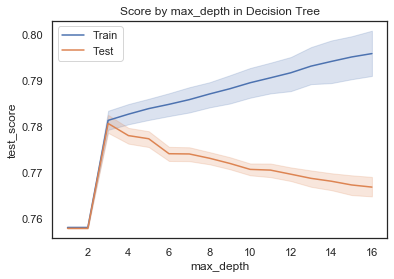

In [159]:
sns.lineplot(x=resultados['max_depth'], y=resultados['train_score'])
sns.lineplot(x=resultados['max_depth'], y=resultados['test_score'])
plt.title('Score by max_depth in Decision Tree')
plt.legend(['Train', 'Test'])

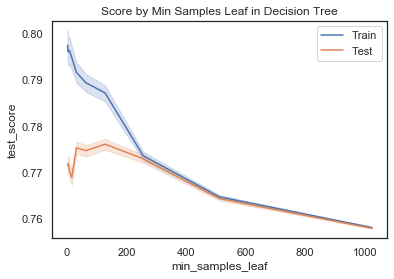

In [160]:
sns.lineplot(x=resultados['min_samples_leaf'], y=resultados['train_score'])
sns.lineplot(x=resultados['min_samples_leaf'], y=resultados['test_score'])
plt.title('Score by Min Samples Leaf in Decision Tree')
plt.legend(['Train', 'Test'])

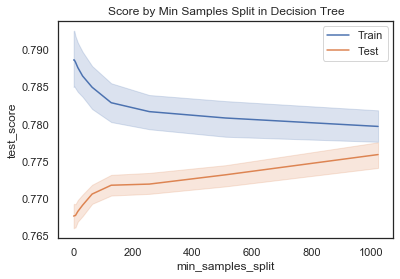

In [161]:
sns.lineplot(x=resultados['min_samples_split'], y=resultados['train_score'])
sns.lineplot(x=resultados['min_samples_split'], y=resultados['test_score'])
plt.title('Score by Min Samples Split in Decision Tree')
plt.legend(['Train', 'Test'])

In [163]:
resultados.sort_values('test_score', ascending=False).head(15)

,max_depth,min_samples_split,min_samples_leaf,train_score,test_score,train_time,test_time
283,3,512,16,0.787597,0.786997,0.008322,0.000000
225,3,8,64,0.787597,0.786997,0.000000,0.000000
296,3,1024,128,0.787597,0.786997,0.007840,0.000853
246,3,32,128,0.787597,0.786997,0.007842,0.001187
245,3,32,64,0.787597,0.786997,0.009486,0.000730
244,3,32,32,0.787597,0.786997,0.008615,0.000000
243,3,32,16,0.787597,0.786997,0.006839,0.004561
242,3,32,8,0.787597,0.786997,0.010921,0.000000
236,3,16,128,0.787597,0.786997,0.004336,0.004267
235,3,16,64,0.787597,0.786997,0.000000,0.000000


In [164]:
corr = resultados.corr()

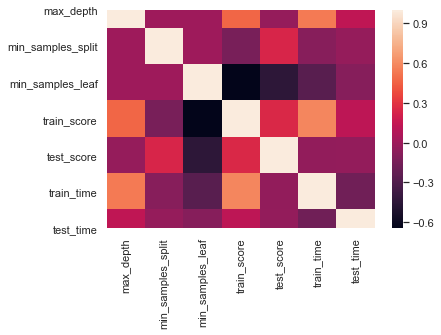

In [165]:
sns.heatmap(corr)

In [166]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192842BDD48>,
      dtype=object)

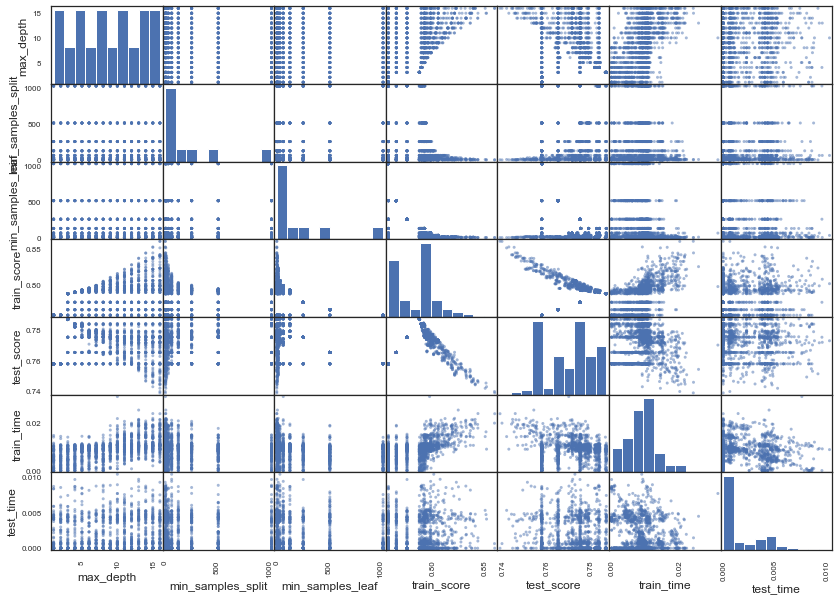

In [167]:
scatter_matrix(resultados, figsize=(14, 10))

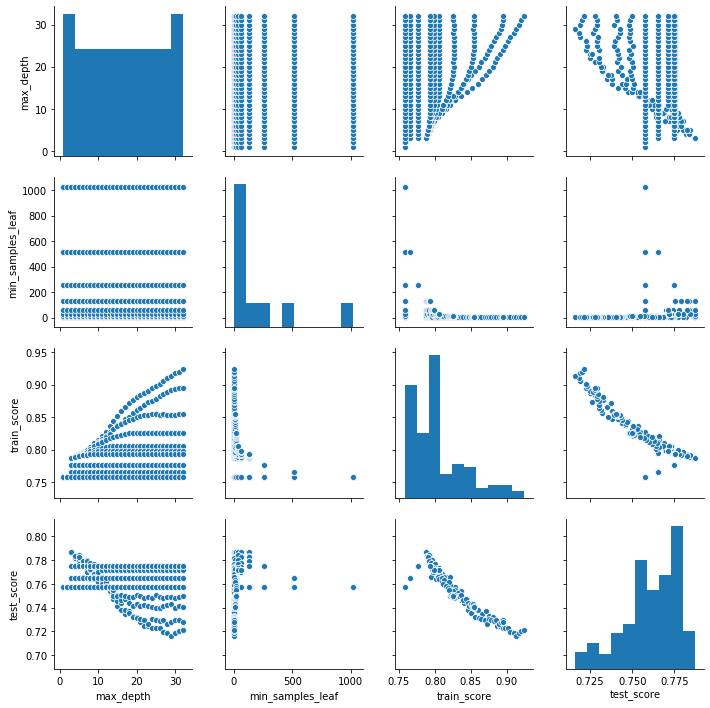

In [140]:
sns.pairplot(resultados)

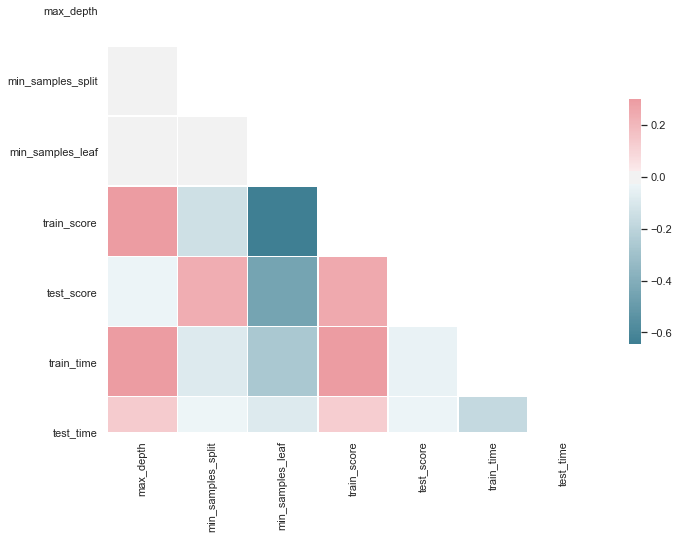

In [168]:
sns.set(style="white")


# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Library to explore hyperparameters in a grid with GridSearchCV

In [169]:
from sklearn.model_selection import GridSearchCV

In [182]:
params_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256, 512],
    'min_samples_leaf': [2, 4, 8, 16, 32, 64, 128, 256, 512],
    'criterion': ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                     params_grid,
                     cv=GroupKFold(n_splits=10))

In [184]:
search.fit(x, y, groups=df['modelo'])

GridSearchCV(cv=GroupKFold(n_splits=10), error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [1, 2, 3, 4, 5, 6

In [185]:
resultados = pd.DataFrame(search.cv_results_)

In [186]:
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003051,0.003654,0.002121,0.003979,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782651,...,0.761515,0.774821,0.765766,0.730019,0.759146,0.741,0.778226,0.7578,0.017236,649
1,0.004728,0.003878,0.000613,0.001839,gini,1,2,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782651,...,0.761515,0.774821,0.765766,0.730019,0.759146,0.741,0.778226,0.7578,0.017236,649
2,0.004677,0.004819,0.000000,0.000000,gini,1,2,8,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782651,...,0.761515,0.774821,0.765766,0.730019,0.759146,0.741,0.778226,0.7578,0.017236,649
3,0.004172,0.004440,0.000885,0.002272,gini,1,2,16,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782651,...,0.761515,0.774821,0.765766,0.730019,0.759146,0.741,0.778226,0.7578,0.017236,649
4,0.004937,0.004994,0.000000,0.000000,gini,1,2,32,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.782651,...,0.761515,0.774821,0.765766,0.730019,0.759146,0.741,0.778226,0.7578,0.017236,649


In [187]:
search.best_params_

{'criterion': 'entropy',
 'max_depth': 6,
 'min_samples_leaf': 2,
 'min_samples_split': 512}

In [188]:
search.best_score_

0.7872

In [189]:
best_estimator = search.best_estimator_

In [190]:
best_estimator

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=512,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [191]:
from sklearn.model_selection import cross_val_score

In [192]:
scores = cross_val_score(search, x, y, cv=GroupKFold(n_splits=10), groups=df['modelo'])

C:\Users\lucasrcs\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: The 'groups' parameter should not be None.

In [193]:
params_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 4, 8, 16, 32, 64, 128, 256, 512],
    'min_samples_leaf': [2, 4, 8, 16, 32, 64, 128, 256, 512],
    'criterion': ['gini', 'entropy']
}

search = GridSearchCV(DecisionTreeClassifier(),
                     params_grid,
                     cv=KFold(n_splits=10, shuffle=True))

In [194]:
search.fit(x, y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=True),
             error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
              

In [195]:
resultados = pd.DataFrame(search.cv_results_)

In [196]:
search.best_params_

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [197]:
search.best_score_

0.7869

In [198]:
search.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [199]:
scores = cross_val_score(search, x, y, cv=KFold(n_splits=10, shuffle=True))

In [200]:
scores

array([0.774, 0.78 , 0.803, 0.786, 0.764, 0.792, 0.791, 0.801, 0.772,
       0.809])

In [203]:
scores.mean()

0.7872000000000001

In [201]:
resultados.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.005628,0.004312,0.000351,0.000540,gini,1,2,2,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.771,...,0.759,0.742,0.751,0.752,0.774,0.763,0.747,0.7579,0.011458,649
1,0.004666,0.003869,0.000471,0.000580,gini,1,2,4,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.771,...,0.759,0.742,0.751,0.752,0.774,0.763,0.747,0.7579,0.011458,649
2,0.004625,0.003266,0.000214,0.000262,gini,1,2,8,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.771,...,0.759,0.742,0.751,0.752,0.774,0.763,0.747,0.7579,0.011458,649
3,0.004336,0.002976,0.000933,0.002104,gini,1,2,16,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.771,...,0.759,0.742,0.751,0.752,0.774,0.763,0.747,0.7579,0.011458,649
4,0.004217,0.000711,0.000561,0.000662,gini,1,2,32,"{'criterion': 'gini', 'max_depth': 1, 'min_sam...",0.771,...,0.759,0.742,0.751,0.752,0.774,0.763,0.747,0.7579,0.011458,649


In [202]:
resultados.sort_values('mean_test_score', ascending=False).head(10)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
180,0.009111,0.000794,0.000797,0.001227,gini,3,8,2,"{'criterion': 'gini', 'max_depth': 3, 'min_sam...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
770,0.013211,0.004022,0.003662,0.003993,entropy,4,32,64,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
762,0.016785,0.004318,0.001044,0.002251,entropy,4,16,128,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
763,0.014107,0.004025,0.002080,0.003255,entropy,4,16,256,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
764,0.014536,0.004572,0.001282,0.001867,entropy,4,16,512,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
781,0.015055,0.004624,0.001002,0.002119,entropy,4,64,256,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
780,0.014371,0.004387,0.002335,0.002925,entropy,4,64,128,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
779,0.014376,0.004233,0.002196,0.003702,entropy,4,64,64,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
765,0.014259,0.004618,0.001720,0.002661,entropy,4,32,2,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1
766,0.013455,0.003392,0.003452,0.003892,entropy,4,32,4,"{'criterion': 'entropy', 'max_depth': 4, 'min_...",0.806,...,0.782,0.765,0.79,0.767,0.804,0.802,0.793,0.7869,0.014138,1


# Hyperparameters Grid with Random Search

In [205]:
from sklearn.model_selection import RandomizedSearchCV

In [208]:
params_grid = {
    'max_depth': [1, 2, 3, 4, 5, 6],
    'min_samples_split': [2, 8, 32, 128, 512],
    'min_samples_leaf': [2, 8, 32, 128, 512],
    'criterion': ['gini', 'entropy']
}

search = RandomizedSearchCV(DecisionTreeClassifier(),
                      n_iter=8,
                      params_grid,
                      cv=KFold(n_splits=10, shuffle=True))

search.fit(x, y)

resultados = pd.DataFrame(search.cv_results_)

SyntaxError: positional argument follows keyword argument (<ipython-input-208-a299ef27a192>, line 10)

In [207]:
scores = cross_val_score(search, x, y, cv=KFold(n_splits=10, shuffle=True))
scores

array([0.766, 0.787, 0.775, 0.785, 0.78 , 0.786, 0.788, 0.805, 0.785,
       0.794])